# TEST JGV package
** This notebook contains tests for all functions contained in JGV package **

### Imports

In [1]:
# For ipython inline ploting ploting
%matplotlib inline

# Larger display 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Import of required packages
import pandas as pd
import pylab as pl
import pysam
from time import time

# Other third party imports
from pycl.pycl import jhelp, jprint, head, tail, cat

# Import functions from JGV
from JGV import JGV
from JGV_Reference import Reference
from JGV_Annotation import Annotation
from JGV_Alignment import Alignment
from JGV_Level import Level

### Folder setup and download test files

In [4]:
!mkdir -p "./downloaded_data/"
!wget "ftp://ftp.sanger.ac.uk/pub/gencode/Gencode_human/release_25/GRCh38.primary_assembly.genome.fa.gz" -O "./downloaded_data/GRCh38_primary.fa.gz"
!wget "ftp://ftp.sanger.ac.uk/pub/gencode/Gencode_human/release_25/gencode.v25.primary_assembly.annotation.gff3.gz" -O "./downloaded_data/gencode_v25_primary.gff3.gz"
!wget "ftp://ftp.sanger.ac.uk/pub/gencode/Gencode_human/release_25/gencode.v25.primary_assembly.annotation.gtf.gz" -O "./downloaded_data/gencode_v25_primary.gtf.gz"
!wget "ftp://ftp.sanger.ac.uk/pub/gencode/Gencode_human/release_25/gencode.v25.lncRNA_transcripts.fa.gz" -O "./downloaded_data/gencode_v25_lncRNA_transcripts.fa.gz"
!wget "ftp://ftp.sanger.ac.uk/pub/gencode/Gencode_human/release_25/gencode.v25.long_noncoding_RNAs.gff3.gz" -O "./downloaded_data/gencode_v25_lncRNA.gff3.gz"
!wget "http://fantom.gsc.riken.jp/5/suppl/Hon_et_al_2016/data/assembly/lv2_permissive/FANTOM_CAT.lv2_permissive.all_lncRNA.bed.gz" -O "./downloaded_data/FANTOM_5_all_lncRNA.bed.gz"
!wget "http://fantom.gsc.riken.jp/5/suppl/Hon_et_al_2016/data/assembly/lv2_permissive/FANTOM_CAT.lv2_permissive.all_lncRNA.gtf.gz" -O "./downloaded_data/FANTOM_5_all_lncRNA.gtf.gz"
!wget -v "http://www.ebi.ac.uk/~aleg/data/share/1M.bam" -O "./downloaded_data/1M.bam"

--2017-07-26 14:55:02--  ftp://ftp.sanger.ac.uk/pub/gencode/Gencode_human/release_25/GRCh38.primary_assembly.genome.fa.gz
           => ‘./downloaded_data/GRCh38_primary.fa.gz’
Resolving ftp.sanger.ac.uk (ftp.sanger.ac.uk)... 193.62.203.17
Connecting to ftp.sanger.ac.uk (ftp.sanger.ac.uk)|193.62.203.17|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/gencode/Gencode_human/release_25 ... done.
==> SIZE GRCh38.primary_assembly.genome.fa.gz ... 844691642
==> PASV ... done.    ==> RETR GRCh38.primary_assembly.genome.fa.gz ... done.
Length: 844691642 (806M) (unauthoritative)

GRCh38.primary_asse 100%[===================>] 805.56M  6.54MB/s    in 2m 16s  

2017-07-26 14:57:19 (5.91 MB/s) - ‘./downloaded_data/GRCh38_primary.fa.gz’ saved [844691642]

--2017-07-26 14:57:19--  ftp://ftp.sanger.ac.uk/pub/gencode/Gencode_human/release_25/gencode.v25.primary_assembly.annotation.gff3.gz
           => ‘./downloaded

**Expand BAM to SAM using samtools**

In [5]:
!samtools view -h "./downloaded_data/1M.bam" > "./downloaded_data/1M.sam"
!samtools view -h "./downloaded_data/1M.bam" | head -n 100197 > "./downloaded_data/100k.sam"
!samtools view "./downloaded_data/1M.bam" > "./downloaded_data/1M_no_header.sam"

samtools view: writing to standard output failed: Broken pipe
samtools view: error closing standard output: -1


In [6]:
!ls -l "./downloaded_data/"

total 1565444
-rw-rw-r-- 1 aleg aleg    535815 Apr 13 17:02 100k.bed.gz
-rw-rw-r-- 1 aleg aleg  25775335 Jul 26 14:58 100k.sam
-rw-rw-r-- 1 aleg aleg  98262031 Feb  6 16:58 1M.bam
-rw-rw-r-- 1 aleg aleg  10403247 Apr 13 17:02 1M.bed.gz
-rw-rw-r-- 1 aleg aleg 257695746 Jul 26 14:58 1M_no_header.sam
-rw-rw-r-- 1 aleg aleg 257702066 Jul 26 14:58 1M.sam
-rw-rw-r-- 1 aleg aleg   4311175 Mar 22 08:21 FANTOM_5_all_lncRNA.bed.gz
-rw-rw-r-- 1 aleg aleg   7530977 Mar 22 08:21 FANTOM_5_all_lncRNA.gtf.gz
-rw-rw-r-- 1 aleg aleg   3255620 Jul 26 14:57 gencode_v25_lncRNA.gff3.gz
-rw-rw-r-- 1 aleg aleg   7230335 Jul 26 14:57 gencode_v25_lncRNA_transcripts.fa.gz
-rw-rw-r-- 1 aleg aleg  46752876 Jul 26 14:57 gencode_v25_primary.gff3.gz
-rw-rw-r-- 1 aleg aleg  38827267 Jul 26 14:57 gencode_v25_primary.gtf.gz
-rw-rw-r-- 1 aleg aleg 844691642 Jul 26 14:57 GRCh38_primary.fa.gz
-rw-rw-r-- 1 aleg aleg       376 Apr 13 16:55 GRCh38_primary.tsv


---

# Reference

## Instanciation

In [2]:
jhelp(Reference.__init__, full=True)

* fp

A fasta file containing the reference sequences OR an tab separated index file containing at least 2 columns

with the refid and the length in bases (like a .fa.fai file generated by samtools faidx, or with the

output_index option of this function)

The fasta option will take more time as the file has to be parsed to get the refid and length of sequences.

Both fasta and infex file can be gziped

*  name

Name of the data file that will be used as track name for plotting. If not given, will be deduced from fp

file name

* refid_list

list of reference sequence id to select from the data file, by default all [ DEFAULT: [] ]

* output_index

If True will write a simple A 2 column index tsv file containing the Reference sequence ids and their

lengths [ DEFAULT: False ]

**Test the instanciation of the Reference class from a fasta files**

In [11]:
jprint(Reference ("./data/yeast.fa.gz", output_index=True, verbose=True))

In [12]:
jprint(Reference ("./data/yeast.fa.gz", refid_list="chr1", output_index=True, verbose=True)) #Xfail

AssertionError: No Sequence found

In [10]:
l = ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX', 'chrY', 'chrM']
r = Reference ("./downloaded_data/GRCh38_primary.fa.gz", refid_list=l, output_index=True, verbose=True)
jprint(r)

**Test the instanciation of the Reference class from a fasta index**

In [13]:
r = Reference ("./downloaded_data/GRCh38_primary.tsv", verbose=True)
jprint(r)

## Properties

In [14]:
r = Reference ("./downloaded_data/GRCh38_primary.tsv")

jprint ("Number of refid: ", r.refid_count)
jprint ("List of refid:\n", r.refid_list)

In [15]:
r = Reference ("./data/yeast.tsv")

jprint ("Number of refid: ", r.refid_count)
jprint ("List of refid:\n", r.refid_list)

## get_refid_len

In [3]:
jhelp(Reference.get_refid_len, full=True)

Return the length of a given refid, If the reference is not found return None

In [20]:
r = Reference ("./data/yeast.tsv")
r.get_refid_len("I", verbose=True)

230218

In [22]:
r = Reference ("./downloaded_data/GRCh38_primary.tsv")
r.get_refid_len("chr8", verbose=True)

145138636

In [21]:
r = Reference ("./downloaded_data/GRCh38_primary.tsv")
r.get_refid_len("chrINVALID", verbose=True)

# Level

## Instanciation

In [4]:
jhelp(Level.__init__, full=True)

Define general options for Level class

* max_depth

Maximal total number of positive or negative levels. Safeguard value in case of highly

overlapped annotations [ DEFAULT: 100 ]

* offset

Minimal distance between 2 contigous annotation features on the same level [ DEFAULT: 10 ]

* filter_pos

Filter-out annotation features on the positive strand [ DEFAULT: False ]

* filter_neg

Filter-out annotation features on the negative strand [ DEFAULT: False ]

* filter_unstrand

Filter-out annotation features with no strand specified [ DEFAULT: False ]

In [16]:
l = Level (max_depth=3, offset=10, filter_pos=False, filter_neg=False, filter_unstrand=True)
jprint(l)

## Calling

In [5]:
jhelp(Level.__call__, full=True)

Compute the level of an annnotation feature based on the instance options and the other features previously

analysed to avoid overlapping. Iterative call of the function has to be done with annotation features sorted

by start coordinates.

* ID

Name of the feature to fit in a level

* start

Start coordinate of the feature to fit in a level, on the positive strand

* end

End coordinate of the feature to fit in a level, on the positive strand

* strand

Strand of the feature. Can be + - or . if unknown

**Test object calling with various values of features**

All should be valid except 4 and 10 

In [56]:
l = Level (max_depth=3, offset=10, filter_pos=False, filter_neg=False, filter_unstrand=True)

jprint(l(ID="1", start=10, end=20, strand="+"))
jprint(l(ID="2", start=12, end=22, strand="+"))
jprint(l(ID="3", start=14, end=24, strand="+"))
jprint(l(ID="4", start=23, end=26, strand="+"))
jprint(l(ID="5", start=14, end=24, strand="-"))
jprint(l(ID="6", start=27, end=43, strand="-"))
jprint(l(ID="7", start=27, end=48, strand="-"))
jprint(l(ID="8", start=54, end=76, strand="-"))
jprint(l(ID="9", start=54, end=76, strand="+"))
jprint(l(ID="10", start=54, end=76, strand="."))

jprint(l)

**Alternative calling**

All should be valid except 3,5,6,7 and 8 

In [60]:
l = Level (max_depth=2, offset=2, filter_pos=False, filter_neg=True, filter_unstrand=False)

jprint(l(ID="1", start=10, end=20, strand="+"))
jprint(l(ID="2", start=12, end=22, strand="+"))
jprint(l(ID="3", start=14, end=24, strand="+"))
jprint(l(ID="4", start=23, end=26, strand="+"))
jprint(l(ID="5", start=14, end=24, strand="-"))
jprint(l(ID="6", start=27, end=43, strand="-"))
jprint(l(ID="7", start=27, end=48, strand="-"))
jprint(l(ID="8", start=54, end=76, strand="-"))
jprint(l(ID="9", start=54, end=76, strand="."))
jprint(l(ID="10", start=54, end=76, strand="."))

jprint(l)

## Properties

In [61]:
l.max_level

2

In [62]:
l.min_level

0

In [63]:
l.n_level

3

# Annotation

## Instantiation

In [6]:
jhelp(Annotation.__init__, full=True)

* fp

A path to a standard genomic file containing features annotations among the following format

gff3: http://www.ensembl.org/info/website/upload/gff3.html

gtf: http://www.ensembl.org/info/website/upload/gff.html

bed:  http://www.ensembl.org/info/website/upload/bed.html

Alternatively, one can use a python pickle file (.pkl) generated during a previous run.

The file can eventually be compressed in ‘gzip’ format

* min_len

Minimal size (start to end) of a feature to be selected [default None]

* max_len

Maximal size (start to end) of a feature to be selected [default None]

* refid_list

List of reference id to select. Example: ["chr1", "chr2", "chr3"] [default None]

* type_list

List of feature type to select. Example: ["exon", "gene"] [default None]

In [8]:
# Instantiation from bed, gtf and gff3 
file_list = ["./downloaded_data/FANTOM_5_all_lncRNA.bed.gz", "./downloaded_data/gencode_v25_lncRNA.gff3.gz", "./downloaded_data/gencode_v25_primary.gtf.gz" ]
refid_list = ["chr1", "chr2", "chr3", "chr4", "chr5", "chr6", "chr7", "chr8", "chr9", "chr10", "chr11", "chr12", "chr13", "chr14", "chr15", "chr16", "chr17", "chr18", "chr19", "chr20", "chr21", "chrX", "chrY", "chrM"]
type_list =  "exon"
min_len = 25
max_len = 5000

for fp in file_list:
    jprint(fp, bold=True)
    jprint (Annotation (fp, refid_list=refid_list, type_list=type_list, min_len=min_len, max_len=max_len, verbose=True))

## to_pickle and load from pickle

In [8]:
jhelp(Annotation.to_pickle, full=True)

Store the parsed file in a pickle file for further use.

* fp

Path to save the pickle file. By default original annotation file (- .gz/.tgz) + .pkl

In [9]:
file_list = ["./downloaded_data/FANTOM_5_all_lncRNA.bed.gz","./downloaded_data/FANTOM_5_all_lncRNA.gtf.gz", "./downloaded_data/gencode_v25_lncRNA.gff3.gz", "./downloaded_data/gencode_v25_primary.gtf.gz" , "./downloaded_data/gencode_v25_primary.gff3.gz"]
for fp in file_list:
    jprint(fp, bold=True)
    a = Annotation (fp)
    pickle_fp = a.to_pickle(verbose=True)
    a = Annotation(pickle_fp, verbose=True)

## Properties

In [10]:
a = Annotation ("./downloaded_data/FANTOM_5_all_lncRNA.bed.pkl", refid_list = ["chr21", "chrX", "chrY", "chrM"])

jprint ("Feature count:", a.feature_count)
jprint ("Refid count:", a.refid_count)
jprint ("Type count:", a.type_count)
jprint("Refid list:", a.refid_list)
jprint("Type list:", a.type_list)
display(a.refid_count_uniq.head())
display(a.type_count_uniq.head())

,count
refid,
chrX,4943
chr21,2765
chrY,376


,count
type,
.,8084


In [13]:
a = Annotation ("./downloaded_data/gencode_v25_primary.gff3.pkl", ref_list=["chr21", "chrX", "chrY", "chrM"], type_list=["exon", "transcript", "CDS"] )

jprint ("Feature count:", a.feature_count)
jprint ("Refid count:", a.refid_count)
jprint ("Type count:", a.type_count)
jprint("Refid list:", a.refid_list)
jprint("Type list:", a.type_list)
display(a.refid_count_uniq.head())
display(a.type_count_uniq.head())

,count
refid,
chr1,190737
chr2,159035
chr17,132275
chr3,129701
chr19,128072


,count
type,
exon,1183020
CDS,705063
transcript,198160


## interval_features

In [7]:
jhelp(Annotation.interval_features, full=True)

Parse the annotation file for the given refid and interval and return a dataframe containing all the features

found for each original line. Features are identified by their ID field for gff3 files, by the entire

attribute field for the bed files and by the first element in the attribute field for the gtf files

* refid

Name of the sequence from the original fasta file to display

* start

Start of the window to display. The coordinate is not verified, if outside of the range it will

return an empty dataframe

* end

End of the window to display. The coordinate is not verified, if outside of the range it will

return an empty dataframe

* feature_types

Name of a valid feature type ( "exon"|"transcript"|"gene"|"CDS"...) or list of names of feature type for

which a row will be returned. The option is not available for bed files. If not given, all features type

found in the interval will be returned [ DEFAULT: None ]

* max_features_per_type

Maximal total number of features for a particular feature type. If more are found, a random sampling will

be performed. If None, all the features will be returned [ DEFAULT: None ]

In [8]:
a = Annotation ("./downloaded_data/FANTOM_5_all_lncRNA.bed.pkl")

display(a.interval_features("chrX", start=70723, end=1456774).head())
display(a.interval_features("chrX", start=71011, end=200000, feature_types=["exon"]).head()) ## Xempty
display(a.interval_features("chr1", start=71011, end=200000).head())

,refid,start,end,ID,score,strand,type
0,chrX,70225,70724,CATG00000110193.1|HBMT00001528801.1,1,+,.
1,chrX,70225,71012,CATG00000110193.1|ENCT00000463832.1,1,+,.
2,chrX,70225,71610,CATG00000110193.1|ENCT00000463833.1,1,+,.
3,chrX,184125,192877,CATG00000112915.1|ENCT00000473979.1,1,-,.
4,chrX,192544,192877,CATG00000112915.1|FTMT29000000005.1,1,-,.


,refid,start,end,strand,ID,type


,refid,start,end,ID,score,strand,type
0,chr1,91420,762886,ENSG00000225880.4|FTMT20100027365.1,1,-,.
1,chr1,91420,762886,ENSG00000240453.1|FTMT20100027364.1,1,-,.


In [9]:
a = Annotation ("./downloaded_data/FANTOM_5_all_lncRNA.gtf.pkl")

display(a.interval_features("chr2", start=100000, end=200000, feature_types="exon").head())
display(a.interval_features("chr2", start=100000, end=200000, feature_types=["exon", "transcript"]).head())
display(a.interval_features("chr2", start=0, end=200000000, max_features_per_type=2))
display(a.interval_features("chr2", start=0, end=10000, feature_types=["exon", "transcript"]).head()) ## Xempty
display(a.interval_features("chrX", start=71011, end=200000, feature_types="CDS").head()) ## Xempty
display(a.interval_features("chrINVALID", start=71011, end=200000, feature_types=["exon"]).head()) ## Xempty
display(a.interval_features("chrX", start=200000, end=10000).head()) ## Xempty

,refid,start,end,ID,score,strand,type
0,chr2,101012,101164,CATG00000041546.1,.,+,exon
1,chr2,130910,131453,CATG00000041547.1,.,+,exon
2,chr2,159154,160407,CATG00000041548.1,.,+,exon
3,chr2,162495,162673,CATG00000041548.1,.,+,exon
4,chr2,167584,170667,CATG00000041548.1,.,+,exon


,refid,start,end,ID,score,strand,type
0,chr2,80646,101164,CATG00000041546.1,.,+,transcript
1,chr2,101012,101164,CATG00000041546.1,.,+,exon
2,chr2,130910,131453,CATG00000041547.1,.,+,exon
3,chr2,130910,131453,CATG00000041547.1,.,+,transcript
4,chr2,159154,160407,CATG00000041548.1,.,+,exon


,refid,start,end,ID,score,strand,type
0,chr2,64984044,64984697,ENSG00000234572.1,.,-,exon
1,chr2,110379029,110379291,CATG00000044127.1,.,+,exon
2,chr2,112186889,112252628,ENSG00000172965.10,.,-,transcript
3,chr2,182304818,182305863,CATG00000045729.1,.,+,transcript
4,chr2,194578338,194586977,CATG00000046066.1,.,+,gene
5,chr2,199608699,199617221,CATG00000046168.1,.,+,gene


,refid,start,end,strand,ID,type


,refid,start,end,strand,ID,type


,refid,start,end,strand,ID,type


,refid,start,end,strand,ID,type


# Alignment

## Instantiation

In [3]:
jhelp(Alignment.__init__, full=True)

* fp

A standard BAM or SAM (http://samtools.sourceforge.net/SAM1.pdf) containing aligned reads and a standard

header. The files do not need to be sorted or indexed.

One can also use a 6 fields bed (chrom, chromStart, chromEnd, name, score, strand, where score is the

coverage value (Much faster than from a Bam/Sam file, can be gzipped). http://www.ensembl.org/info/website/upload/bed.html

*  name

Name of the data file that will be used as track name for plotting. If not given, will be deduced from fp

file name  [ DEFAULT: None ]

* min_coverage

Minimal coverage to compute the data. If less, the coverage will be considered null. Not used for

if fp is a bed coverage file [ DEFAULT: 5 ]

* refid_list

list of reference sequence id to select from the data file, by default all, Not used for if fp is a bed

coverage file [ DEFAULT: [] ]

* output_bed

If True will be write a 6 columns compressed bed file containing the coverage values for + and - strand

excluding positions with coverage lesser than min_coverage.the option will apply only is the input file is

BAM or SAM. [ DEFAULT: False ]

**Test instantiation from BAM, SAM and BED files**

In [8]:
file_list = ["./downloaded_data/1M.bam", "./downloaded_data/1M.sam","./downloaded_data/100k.sam", "./downloaded_data/1M.bed.gz", "./downloaded_data/100k.bed.gz"]
l = ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX', 'chrY', 'chrM']

for fp in file_list:
    jprint(fp, bold=True)
    %time jprint(Alignment (fp, refid_list=l, min_coverage=5, output_bed=True, verbose=True))

CPU times: user 1min 11s, sys: 780 ms, total: 1min 11s
Wall time: 1min 11s


CPU times: user 1min 9s, sys: 620 ms, total: 1min 9s
Wall time: 1min 9s


CPU times: user 5.69 s, sys: 72 ms, total: 5.76 s
Wall time: 5.76 s


CPU times: user 4.92 s, sys: 24 ms, total: 4.94 s
Wall time: 4.94 s


CPU times: user 292 ms, sys: 0 ns, total: 292 ms
Wall time: 291 ms


**Suposed to fail if no header in the sam/bam file**

In [9]:
a = Alignment (fp="./downloaded_data/1M_no_header.sam", verbose=True)

ValueError: file has no sequences defined (mode='r') - is it SAM/BAM format? Consider opening with check_sq=False

## Properties

In [11]:
a = Alignment (fp="./downloaded_data/1M.bed.gz", verbose=True)
jprint ("Number of refid: ", a.refid_count)
jprint ("List of refid:\n", a.refid_list)
jprint ("Base coverage of the reference sequence:\n", a.refid_nbases)

In [13]:
l = ['chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX', 'chrY', 'chrM']
a = Alignment (fp="./downloaded_data/1M.bed.gz", verbose=True, refid_list=l)
jprint ("Number of refid: ", a.refid_count)
jprint ("List of refid:\n", a.refid_list)
jprint ("Base coverage of the reference sequence:\n", a.refid_nbases)

## interval_coverage

In [14]:
jhelp(Alignment.interval_coverage, full=True)

Parse the alignment file for a given refid and interval. The interval is splited in a number of windows equal to

bins, for which the coverage in computed. The method return a dataframe containing the starting positions of

the windows and the coverage for the + and - strands. If the refid or the coordinates are invalid a zero filled

dataframe will be returned.

* refid

Name of the sequence from the original fasta file to display

* start

Start of the window to display. The coordinate is not verified, if outside of the range it will

return empty bins

* end

End of the window to display. The coordinate is not verified, if outside of the range it will

return empty bins

* bins

Number of alignment count bins to divide the displayed window. Low number will result in low resolution

high value could result in a long ploting time. The value is automatically adjusted if lower than base

resolution, ie if the requested interval is lower than the number of bins [ DEFAULT: 500 ]

* bin_repr_fun

Function to represent each bin ("max", "mean" and "sum") [ DEFAULT: "max" ]

In [15]:
a = Alignment (fp="./downloaded_data/1M.bed.gz", verbose=True)

,+,-
500,0,0
547,0,0
595,0,0
642,165,0
690,228,8


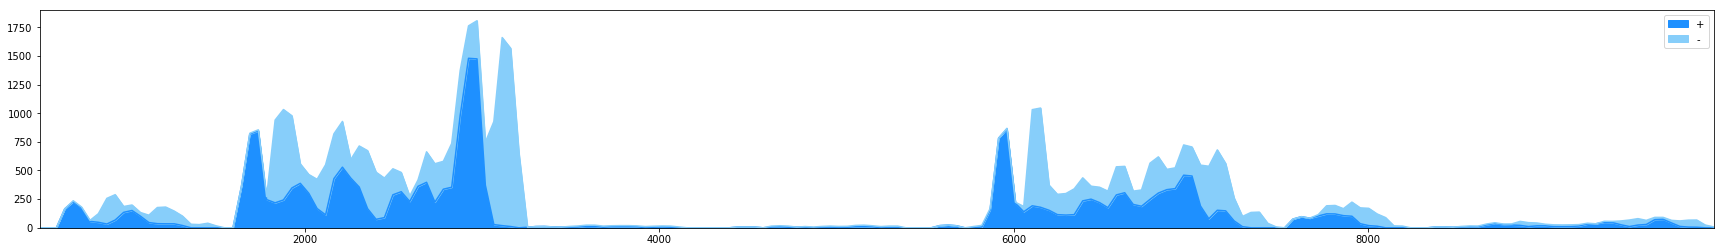

In [16]:
df = a.interval_coverage(refid="chrM", start=500, end=10000, bins=200, bin_repr_fun='max')
display(df.head(5))
df.plot.area(figsize=(30, 4), color=("dodgerblue", "lightskyblue"))

,+,-
0,0.03275,0.0320333
600000,0.194345,0.196758
1200000,0.167758,0.156655
1800000,0.000535,0.000838333
2400000,0.00483333,0.00194667


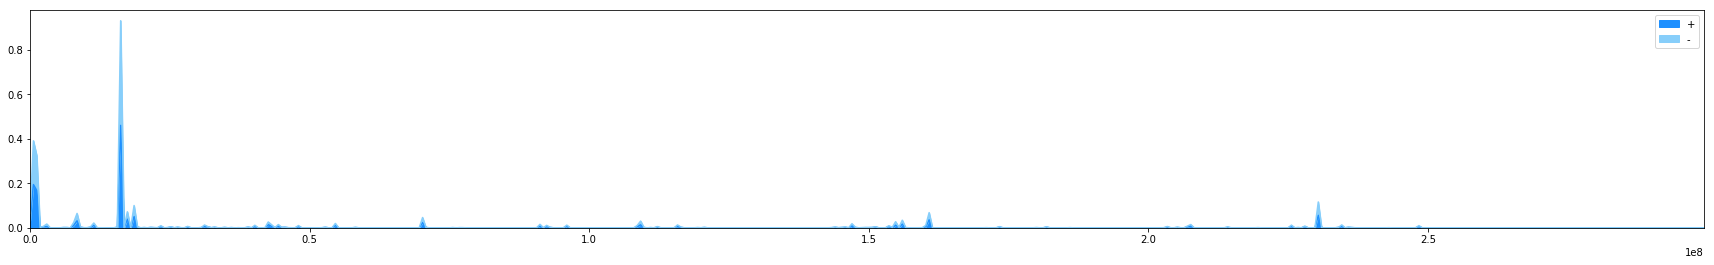

In [17]:
df = a.interval_coverage(refid="chr1", start=0, end=300000000, bins=500, bin_repr_fun='mean')
display(df.head(5))
df.plot.area(figsize=(30, 4), color=("dodgerblue", "lightskyblue"))

,+,-
0,0,0
600000,0,0
1200000,0,0
1800000,0,0
2400000,0,0


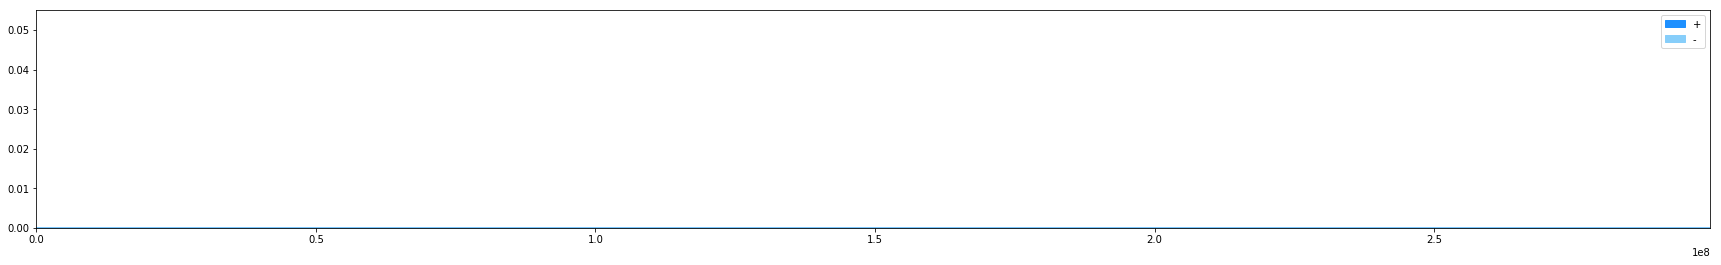

In [18]:
df = a.interval_coverage(refid="chr47", start=0, end=300000000)
display(df.head(5))
df.plot.area(figsize=(30, 4), color=("dodgerblue", "lightskyblue"))

,+,-
1997,0,0
2951,0,0
3906,0,0
4861,0,0
5816,0,0


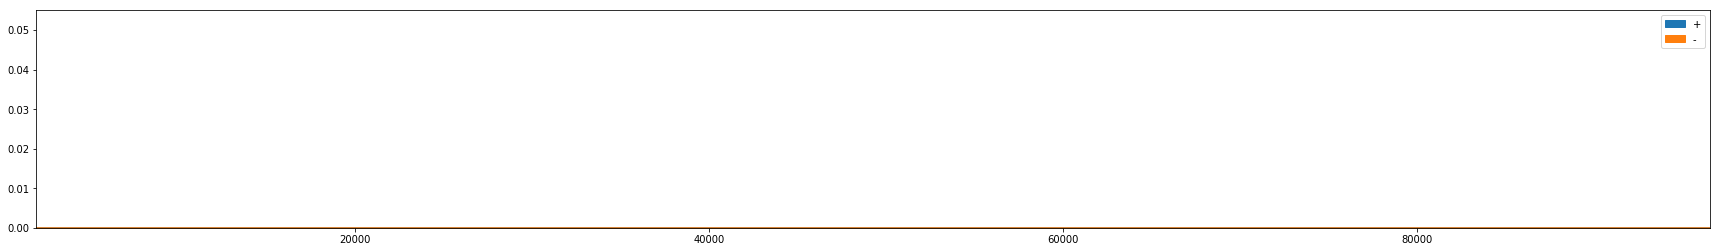

In [19]:
df = a.interval_coverage(refid="chr7", start=1997, end=97495, bins=100, bin_repr_fun='max')
display(df.head(5))
df.plot.area(figsize=(30, 4))

# JGV

## Test Instantiation

In [20]:
jhelp(JGV.__init__, full= True)

* fp

A fasta file containing the reference sequences OR an tab separated index file containing at least 2 columns

with the refid and the length in bases (like a .fa.fai file generated by samtools faidx).

The fasta option will take more time as the file has to be parsed to get the refid and length of sequences.

A 2 column index tsv file will be automatically generated for latter usage as an index file.

Both fasta and infex file can be gziped

*  name

Name of the data file that will be used as track name for plotting. If not given, will be deduced from fp

file name

* refid_list

list of reference sequence id to select from the data file, by default all [ DEFAULT: [] ]

* output_index

If True will write a simple A 2 column index tsv file containing the Reference sequence ids and their

lengths [ DEFAULT: False ]

In [21]:
# Init with a fasta file
fp = "./downloaded_data/GRCh38_primary.fa.gz"
l = ['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9','chr10','chr11','chr12','chr13','chr14','chr15','chr16','chr17','chr18','chr19','chr20','chr21','chr22','chrX','chrY','chrM']
j = JGV(fp=fp, refid_list=l, output_index=True, verbose=True)

In [22]:
# Init with a fasta index file
fp = "./downloaded_data/GRCh38_primary.tsv"
j = JGV(fp=fp, verbose=True)

## add_annotation

In [13]:
jhelp(JGV.add_annotation, full=True)

* fp

An URL to a standard genomic file containing features annotations among the following format:

gff3: http://www.ensembl.org/info/website/upload/gff3.html

gtf:  http://www.ensembl.org/info/website/upload/gff.html

bed:  http://www.ensembl.org/info/website/upload/bed.html

Valid URL schemes include http, ftp, s3, and file.

The file can eventually be compressed in ‘gzip’, ‘bz2’, ‘zip’ or ‘xz’

*  name

Name of the data file that will be used as track name for plotting. If not given, will be deduced from fp

file name  [ DEFAULT: None ]

* min_len

Minimal size (start to end) of a feature to be selected [default None]

* max_len

Maximal size (start to end) of a feature to be selected [default None]

* refid_list

List of reference id to select. Example: ["chr1", "chr2", "chr3"] [default None]

* type_list

List of feature type to select. Example: ["exon", "gene"] [default None]

In [23]:
j.add_annotation("./downloaded_data/gencode_v25_primary.gff3.pkl", refid_list= ['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9','chr10'], type_list=["exon", "transcript", "gene"], verbose=True)

/home/aleg/Programming/Python3/JupyterGenoViewer/JGV/JGV.py:130: UserWarning: No annotation found for chr19,chr17,chr14,chr16,chr15,chr18,chr22,chrY,chr12,chr11,chr21,chr13,chrM,chr20,chrX
  warnings.warn("No annotation found for {}".format(",".join(not_found)))


In [24]:
j.add_annotation("./downloaded_data/FANTOM_5_all_lncRNA.gtf.pkl", min_len=50, max_len=5000, verbose=True)

/home/aleg/Programming/Python3/JupyterGenoViewer/JGV/JGV.py:130: UserWarning: No annotation found for chrM
  warnings.warn("No annotation found for {}".format(",".join(not_found)))


## add_alignment

In [25]:
jhelp(JGV.add_alignment, full=True)

* fp

A standard BAM or SAM (http://samtools.sourceforge.net/SAM1.pdf) containing aligned reads and a standard

header. The files do not need to be sorted or indexed.

One can also use a 6 fields bed (chrom, chromStart, chromEnd, name, score, strand) file with a hastaged

commented header listing the reference sequences id and length, similar to the format generated by the

output_bed option (Much faster than from a Bam/Sam file, can be gzipped). http://www.ensembl.org/info/website/upload/bed.html

*  name

Name of the data file that will be used as track name for plotting. If not given, will be deduced from fp

file name  [ DEFAULT: None ]

* min_coverage

Minimal coverage to compute the data. If less, the coverage will be considered null. Not used for

if fp is a bed coverage file [ DEFAULT: 5 ]

* output_bed

If True will be write a 6 columns compressed bed file containing the coverage values for + and - strand

excluding positions with coverage lesser than min_coverage.the option will apply only is the input file is

BAM or SAM. The file starts with a header consisting of a list of the ID of the reference sequences and

their length [ DEFAULT: False ]. Example:

#chr20	64444167

#chr21	46709983

chr20	276516	276516	pos1	5	+

chr20	276517	276517	pos2	5	+

In [26]:
j.add_alignment("./downloaded_data/1M.bed.gz", min_coverage=10, verbose=True)

In [27]:
j.add_alignment("./downloaded_data/100k.sam", refid_list= ['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9','chr10'], verbose=True)

/home/aleg/Programming/Python3/JupyterGenoViewer/JGV/JGV.py:164: UserWarning: No coverage found for chr19,chr17,chr14,chr16,chr15,chr18,chr22,chrY,chr12,chr11,chr21,chr13,chrM,chr20,chrX
  warnings.warn("No coverage found for {}".format(",".join(not_found)))


## Annotation_summary

In [28]:
jhelp(JGV.alignment_summary, full=True)

Display table summarizing annotation file information

**without and with annotation track**

In [29]:
# Empty JGV object
j = JGV("./downloaded_data/GRCh38_primary.tsv", ref_list=l)
j.annotation_summary()

/home/aleg/Programming/Python3/JupyterGenoViewer/JGV/JGV.py:171: UserWarning: No annotation track loaded
  warnings.warn("No annotation track loaded")


In [30]:
# JGV object with 3 annotations
l = ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10']
j = JGV("./downloaded_data/GRCh38_primary.tsv", ref_list=l)
j.add_annotation("./downloaded_data/FANTOM_5_all_lncRNA.gtf.pkl", refid_list=l)
j.add_annotation("./downloaded_data/gencode_v25_lncRNA.gff3.pkl", refid_list=l)
j.add_annotation("./downloaded_data/gencode_v25_primary.gff3.pkl", refid_list=l)
j.annotation_summary()

,Feature count,Refid count,Feature type count
FANTOM_5_all_lncRNA,377830,10,3
gencode_v25_lncRNA,70372,10,3
gencode_v25_primary,1311600,10,9


,FANTOM_5_all_lncRNA,gencode_v25_lncRNA,gencode_v25_primary
refid,,,
chr1,53694,10896,231881
chr10,28426,5201,90525
chr2,55904,13051,192231
chr3,39353,8302,159916
chr4,33650,5568,99668
chr5,36594,6628,114550
chr6,40392,5487,115882
chr7,33329,5589,122040
chr8,32179,5530,94109


,FANTOM_5_all_lncRNA,gencode_v25_lncRNA,gencode_v25_primary
type,,,
CDS,NaN,NaN,363100
exon,236297.0,47411.0,608187
five_prime_UTR,NaN,NaN,68824
gene,37652.0,7862.0,30077
start_codon,NaN,NaN,40226
stop_codon,NaN,NaN,36431
stop_codon_redefined_as_selenocysteine,NaN,NaN,61
three_prime_UTR,NaN,NaN,65230
transcript,103881.0,15099.0,99464


## alignment_summary

In [31]:
jhelp(JGV.alignment_summary, full=True)

Display table summarizing annotation file information

**without and with alignment track**

In [32]:
# Empty JGV object
j = JGV("./downloaded_data/GRCh38_primary.tsv", ref_list=l)
j.alignment_summary()

/home/aleg/Programming/Python3/JupyterGenoViewer/JGV/JGV.py:199: UserWarning: No alignment track loaded
  warnings.warn("No alignment track loaded")


In [33]:
# JGV object with 2 alignment tracks
l = ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10']
j = JGV("./downloaded_data/GRCh38_primary.tsv", refid_list=l)
j.add_alignment("./downloaded_data/1M.bed.gz", refid_list=l)
j.add_alignment("./downloaded_data/100k.bed.gz", refid_list=l)
j.alignment_summary()

,Refid count,Base coverage
1M,10,17317694
100k,10,562646


,1M,100k
chr1,3345518,151526
chr10,709208,14328
chr2,3368306,102540
chr3,3312210,127588
chr4,982120,41156
chr5,507738,3050
chr6,2531380,88328
chr7,745494,10264
chr8,747100,8372
chr9,1068620,15494


## refid_coverage_plot

In [34]:
jhelp(JGV.refid_coverage_plot, full=True)

* norm_len

If True, for each refid, the base counts are normalised by the length of refid in bases

* norm_depth [ DEFAULT: True ]

If True, for each track, the base counts are normalised by the overall number of bases mapped

* plot_style [ DEFAULT: True ]

Default plot style for pyplot ('grayscale'|'bmh'|'ggplot'|'dark_background'|'classic'|'fivethirtyeight'...)

[ DEFAULT: "ggplot" ]

* figwidth

Width of the ploting area in inches [ DEFAULT: 20 ]

* figheight

height of the ploting area in inches [ DEFAULT: 5 ]

* log

if True the yscale will be log10 else it will be linear [ DEFAULT: True ]

* refid_list

list of reference sequence id to display, by default all. The list is also used to reorder the reference in

the dataframe and in the graph [ DEFAULT: [] ]

* kwargs

Additional parameters for plot appearance derived from pylab basic plot arguments such as: color, alpha,

fontsize...

In [36]:
# JGV object with 2 annotations and 2 alignment tracks
l = ['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9','chr10','chr11','chr12','chr13','chr14','chr15','chr16','chr17','chr18','chr19','chr20','chr21','chr22','chrX','chrY','chrM']
j = JGV("./downloaded_data/GRCh38_primary.tsv", refid_list=l)
j.add_annotation("./downloaded_data/FANTOM_5_all_lncRNA.gtf.pkl", refid_list=l)
j.add_annotation("./downloaded_data/gencode_v25_lncRNA.gff3.pkl", refid_list=l)
j.add_alignment("./downloaded_data/1M.bed.gz", refid_list=l)
j.add_alignment("./downloaded_data/100k.bed.gz", refid_list=l)

,1M,100k
chr1,67.487628,76.540885
chr10,14.306534,7.237555
chr11,38.855760,27.508570
chr12,35.866672,36.764639
chr13,3.676649,0.940559
chr14,39.119375,33.009475
chr15,12.100342,1.720485
chr16,76.869961,27.592422
chr17,53.154749,13.583044
chr18,1.612916,0.060616


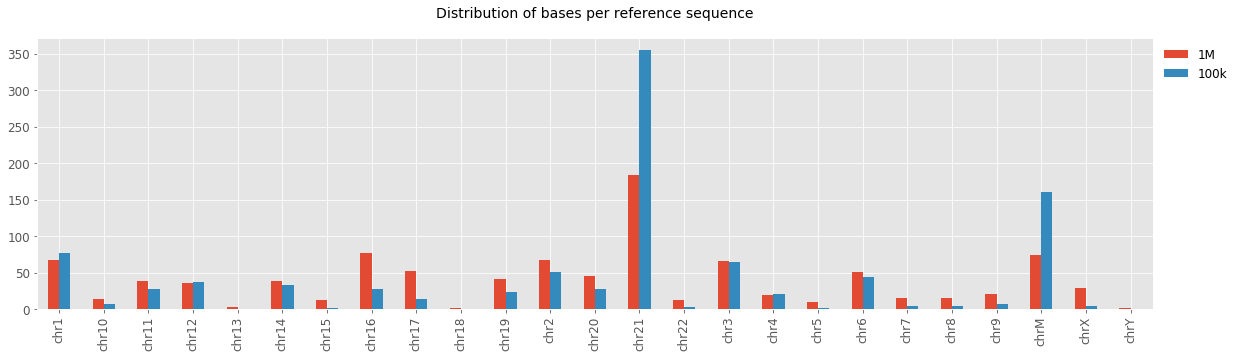

In [42]:
df = j.refid_coverage_plot(norm_depth=True, norm_len=False)
display(df)

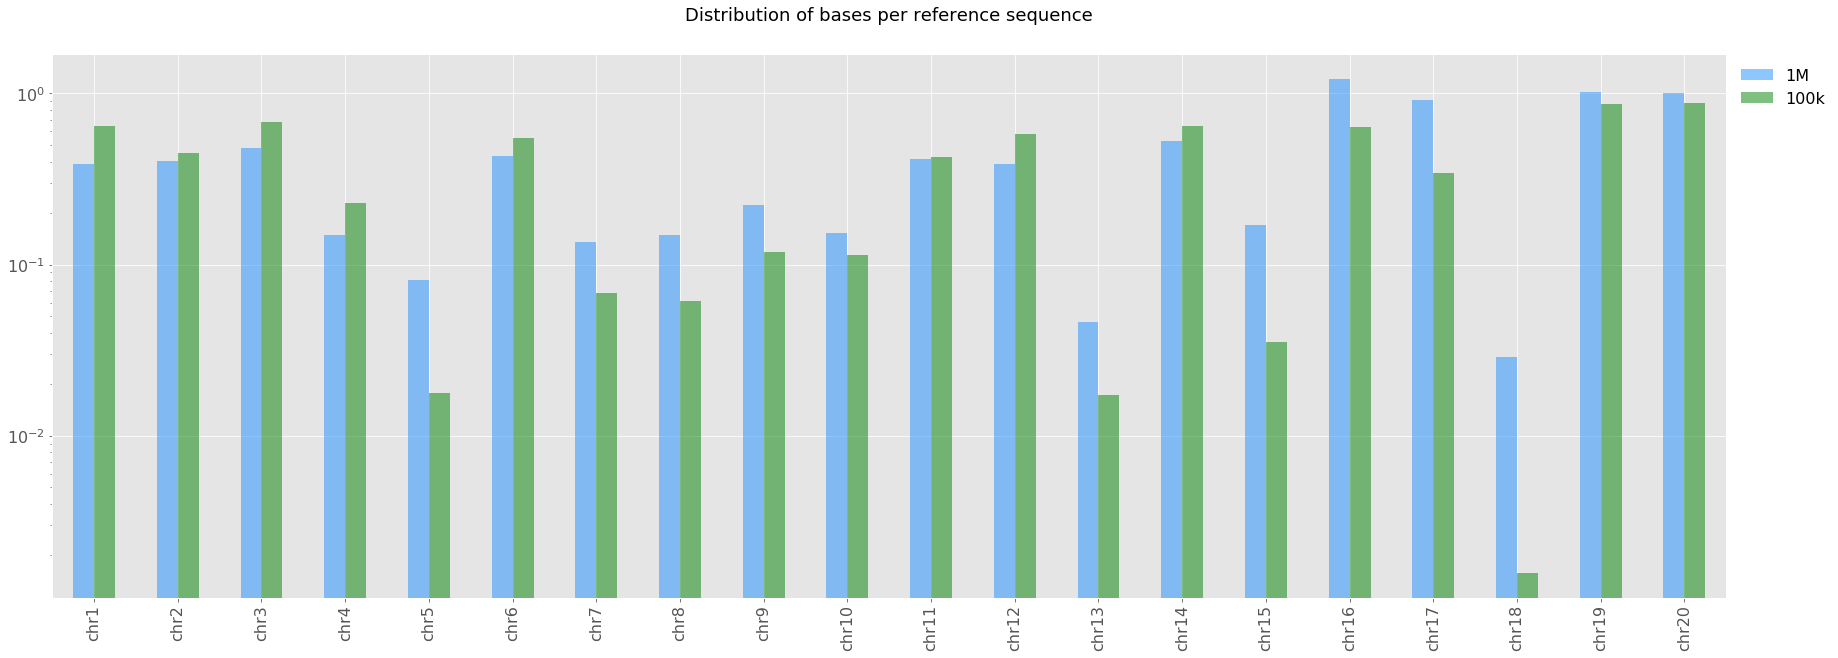

In [44]:
r = j.refid_coverage_plot(
    norm_depth = True,
    norm_len =  True,
    plot_style="ggplot",
    figwidth = 30,
    figheight = 10, 
    log = True,
    refid_list = ['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9','chr10','chr11','chr12','chr13','chr14','chr15','chr16','chr17','chr18','chr19','chr20'],
    color=("dodgerblue", "green"),
    alpha=0.5,
    fontsize=16)

## Interval_plot

In [45]:
jhelp(JGV.interval_plot, full=True)

* refid

Name of the sequence from the original fasta file to display

* start

Start of the window to display. If not given, will be set to 0 [ DEFAULT: None ]

* end

End of the window to display. If not given, will be set to the length of refid [ DEFAULT: None ]

* plot_style [ DEFAULT: True ]

Default plot style for pyplot ('grayscale'|'bmh'|'ggplot'|'dark_background'|'classic'|'fivethirtyeight'...)

[ DEFAULT: "ggplot" ]

* figwidth

Width of the ploting area in inches [ DEFAULT: 20 ]

* alignment_track_height

Height of individual aligment tracks [DEFAULT : 5 ]

* annotation_track_height

Height of individual annotation tracks for each feature types [DEFAULT : 2 ]

* alignment_bins

Number of alignment count bins to divide the displayed window. Low number will result in low resolution

high value could result in a long ploting time. The value is automatically adjusted if lower than base

resolution, ie if the requested interval is lower than the number of bins [ DEFAULT: 500 ]

* alignment_bin_repr_fun

Function to represent each bin ("max", "mean" and "sum") [ DEFAULT: "max" ]

* alignment_log

if True the yscale will be log10 else it will be linear [ DEFAULT: True ]

* alignment_color

Tuple of 2 color for the alignment + and - tracks [DEFAULT : ("dodgerblue", "darkorange") ]

* alignment_alpha

Transparency of the alignment coverage area between 0 and 1 [ DEFAULT: 0.5 ]

* feature_types

Name of a valid feature type ( "exon"|"transcript"|"gene"|"CDS"...) or list of names of feature type for

which a row will be returned. The option is not available for bed files. If not given, all features type

found in the interval will be returned [ DEFAULT: None ]

* max_features_per_type

Maximal total number of features for a particular feature type. If more are found, a random sampling will

be performed. If None, all the features will be returned [ DEFAULT: 500 ]

* annotation_offset

Minimal distance between 2 contigous annotation features on the same level. If not given, will be

automatically set to 1/400 of the windows to display [DEFAULT : None ]

* annotation_label

If True, labels of features will be plotted. To be avoid when expecting many features [DEFAULT : False ]

* max_label_size

limit the size of the label text for each feature  [DEFAULT : "50" ]

* annotation_color

Color of the annotation arrows [DEFAULT : "grey" ]

* kwargs

In [54]:
# Create an instances of IGV
l = ['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9','chr10','chr11','chr12','chr13','chr14','chr15','chr16','chr17','chr18','chr19','chr20','chr21','chr22','chrX','chrY','chrM']
j = JGV(fp = "./downloaded_data/GRCh38_primary.tsv", ref_list=l)

# Add annotation track only
j.add_annotation("./downloaded_data/FANTOM_5_all_lncRNA.gtf.pkl", type_list="exon", ref_list=l)
j.add_annotation("./downloaded_data/gencode_v25_lncRNA.gff3.pkl", ref_list=l)
j.add_annotation("./downloaded_data/gencode_v25_lncRNA.gff3.pkl", name="gencode_lnc_gene_min_2000" ,min_len=2000, ref_list=l, type_list="gene")

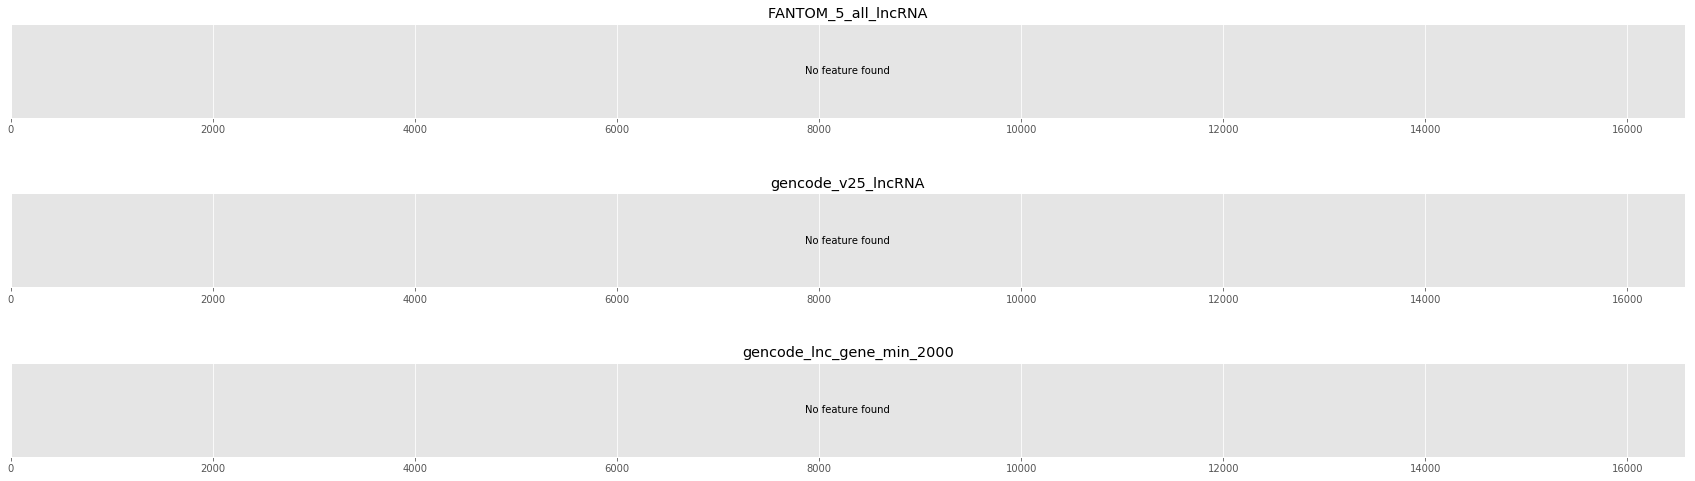

In [55]:
j.interval_plot(refid="chrM") #Xempty

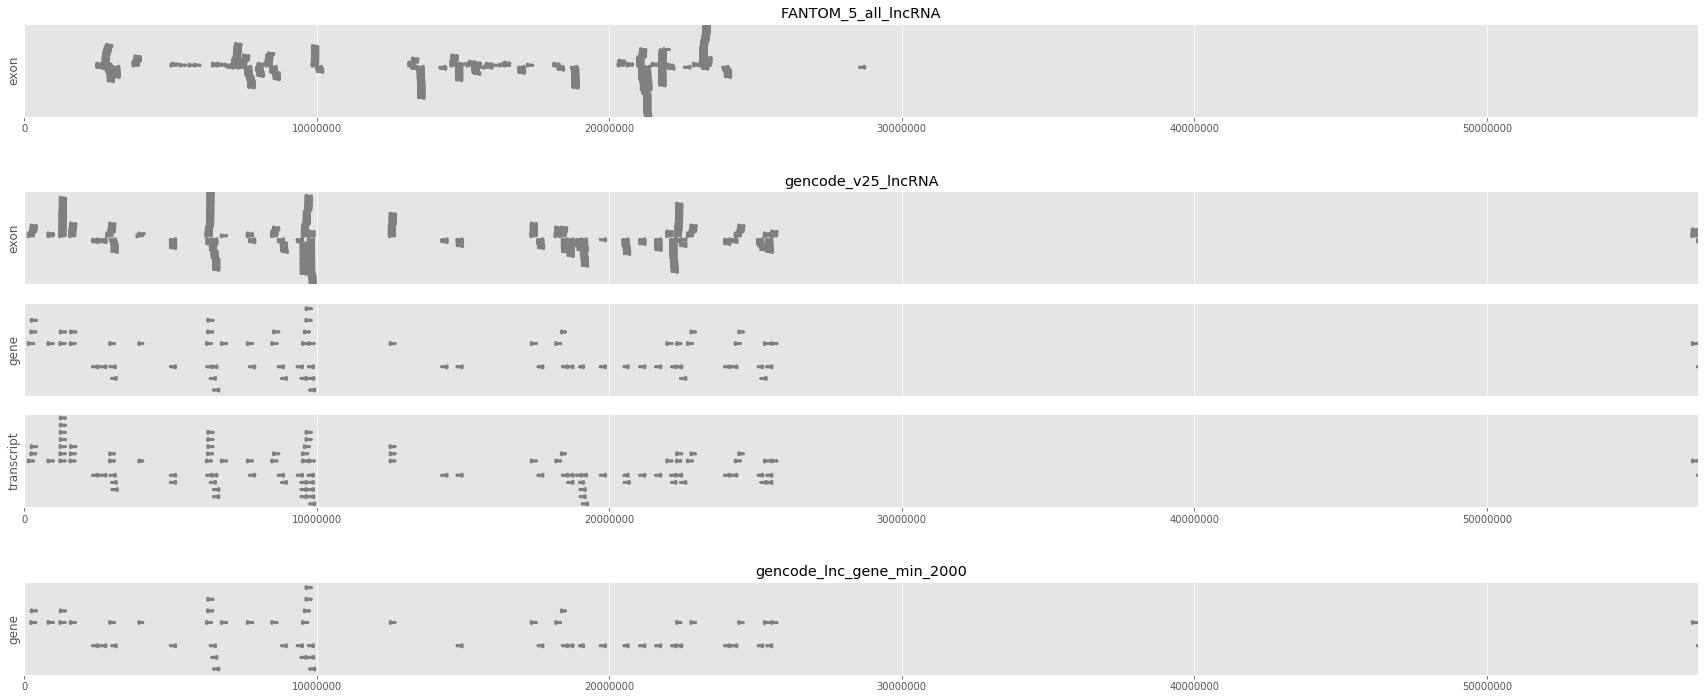

In [56]:
j.interval_plot(refid="chrY")

In [59]:
# Create an instances of IGV
l = ['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9','chr10','chr11','chr12','chr13','chr14','chr15','chr16','chr17','chr18','chr19','chr20','chr21','chr22','chrX','chrY','chrM']
j = JGV(fp = "./downloaded_data/GRCh38_primary.tsv", ref_list=l)

# 3 alignment tracks only
j.add_alignment("./downloaded_data/1M.bed.gz", ref_list=l)
j.add_alignment("./downloaded_data/1M.bed.gz", name="1M_min_cov=50",ref_list=l, min_coverage=50)
j.add_alignment("./downloaded_data/100k.bed.gz", ref_list=l)

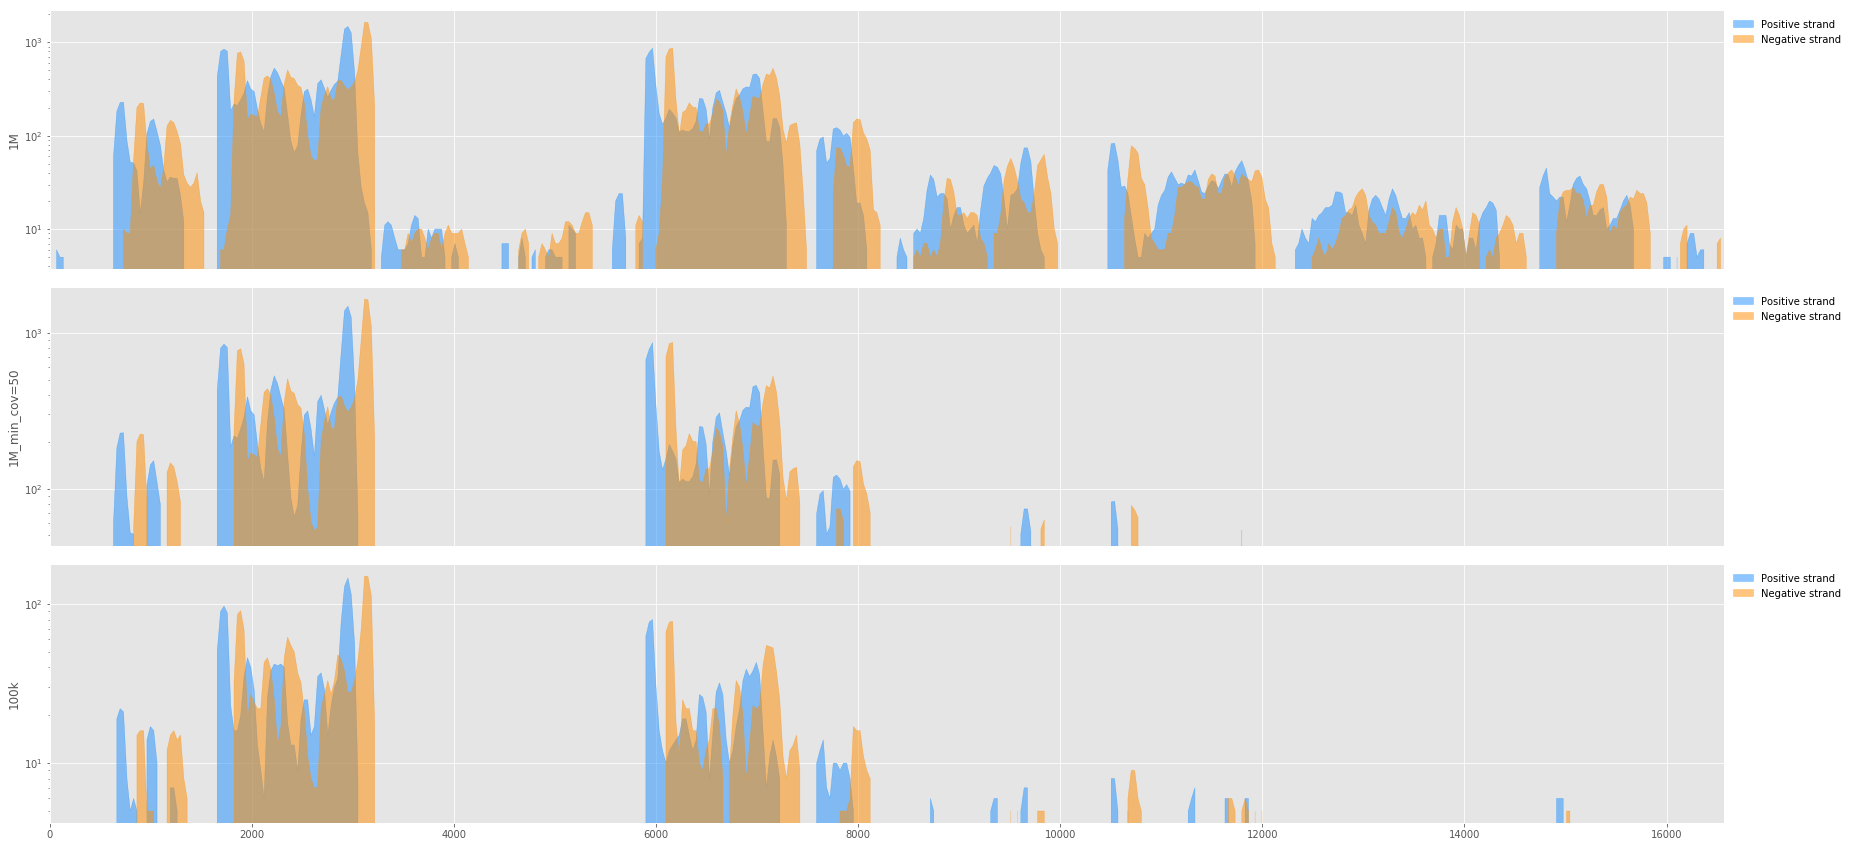

In [60]:
j.interval_plot(refid="chrM")

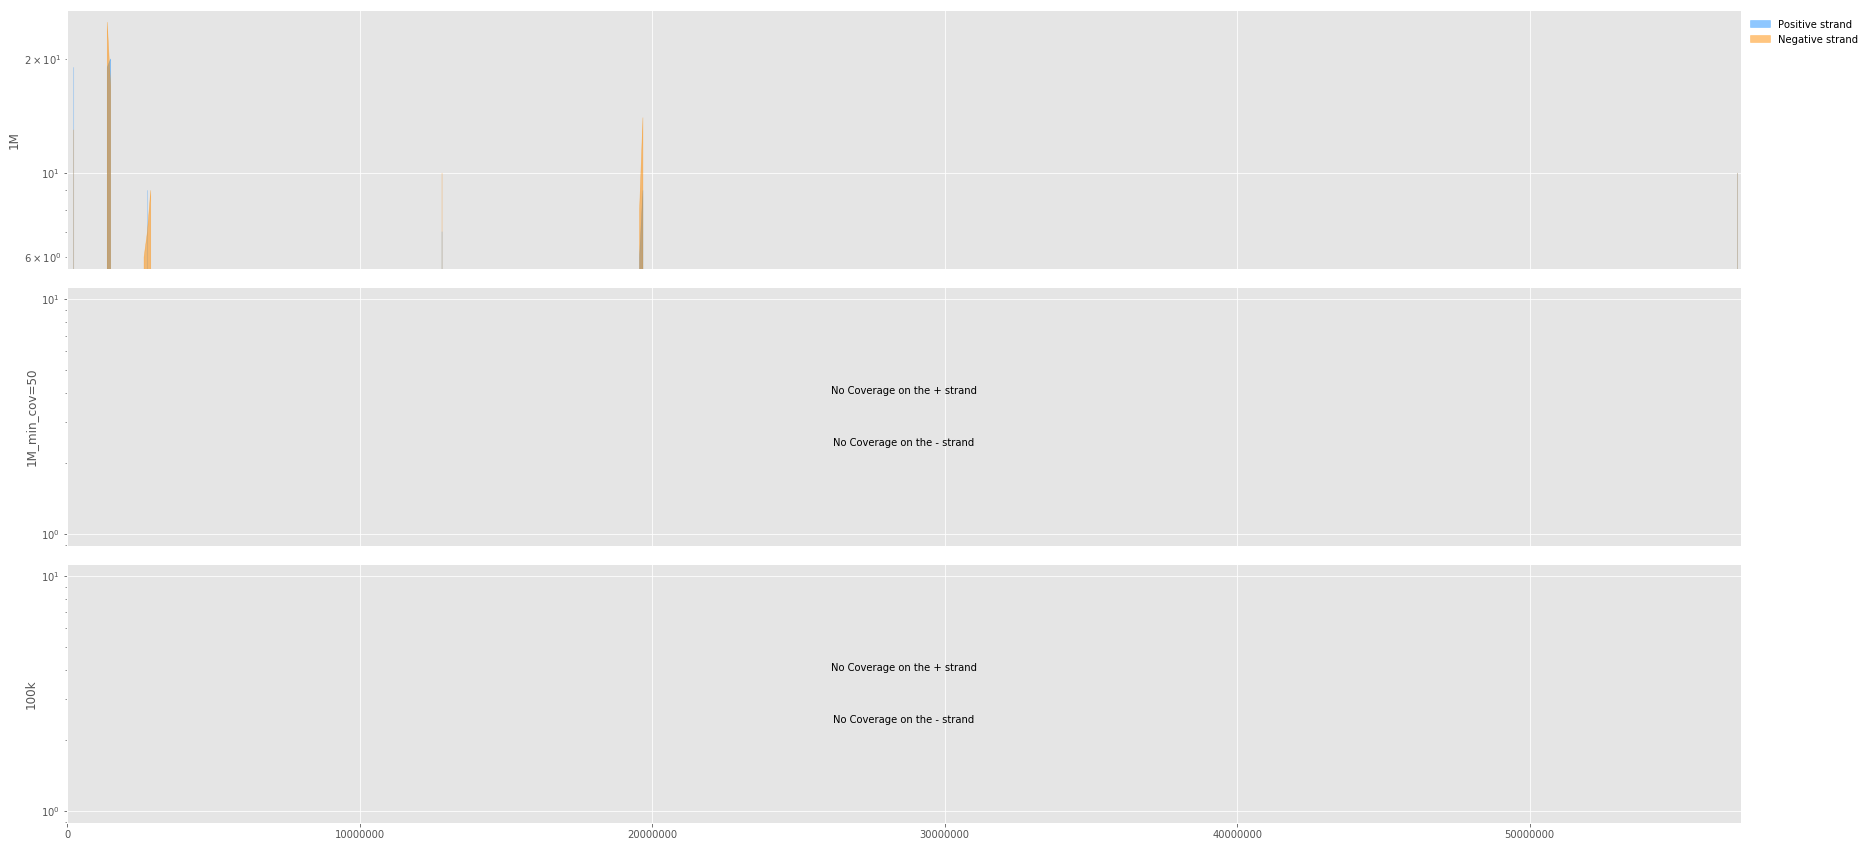

In [61]:
j.interval_plot(refid="chrY")

In [62]:
# Create an instances of IGV
l = ['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9','chr10','chr11','chr12','chr13','chr14','chr15','chr16','chr17','chr18','chr19','chr20','chr21','chr22','chrX','chrY','chrM']
j = JGV(fp = "./downloaded_data/GRCh38_primary.tsv", ref_list=l)

# 1 alignment track
j.add_alignment("./downloaded_data/1M.bed.gz", ref_list=l)

# 1 annotation track
j.add_annotation("./downloaded_data/gencode_v25_lncRNA.gff3.pkl", ref_list=l)

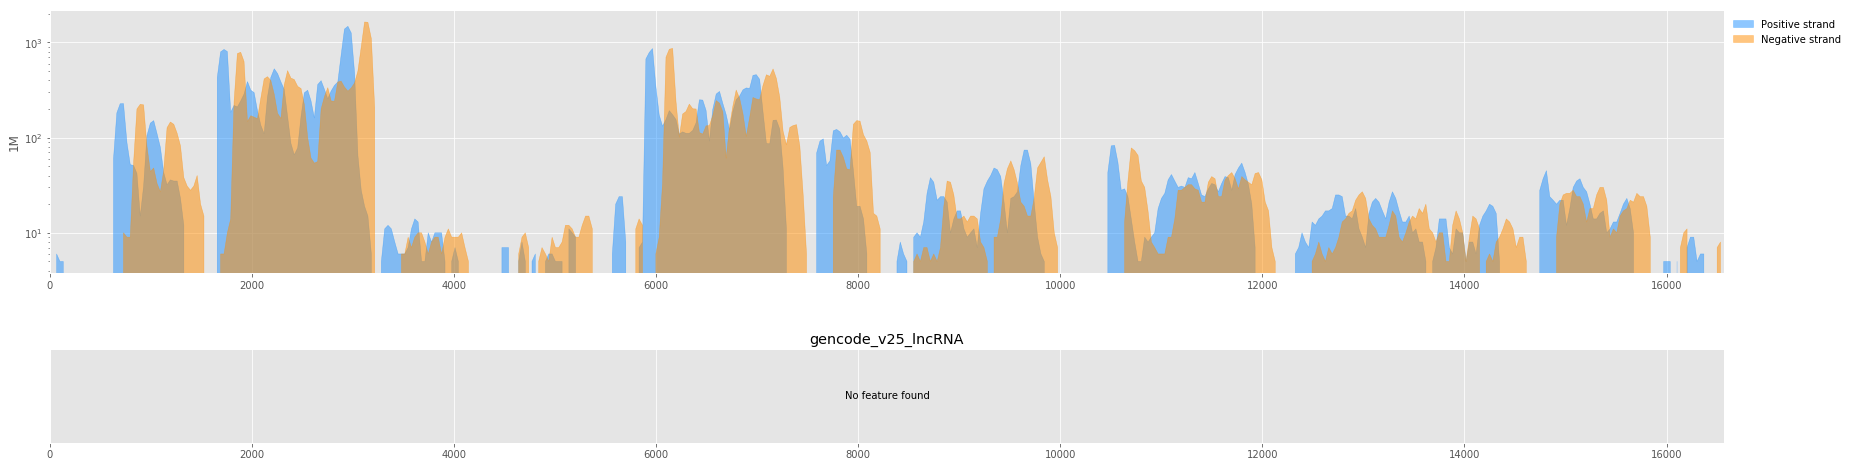

In [64]:
j.interval_plot(refid="chrM")

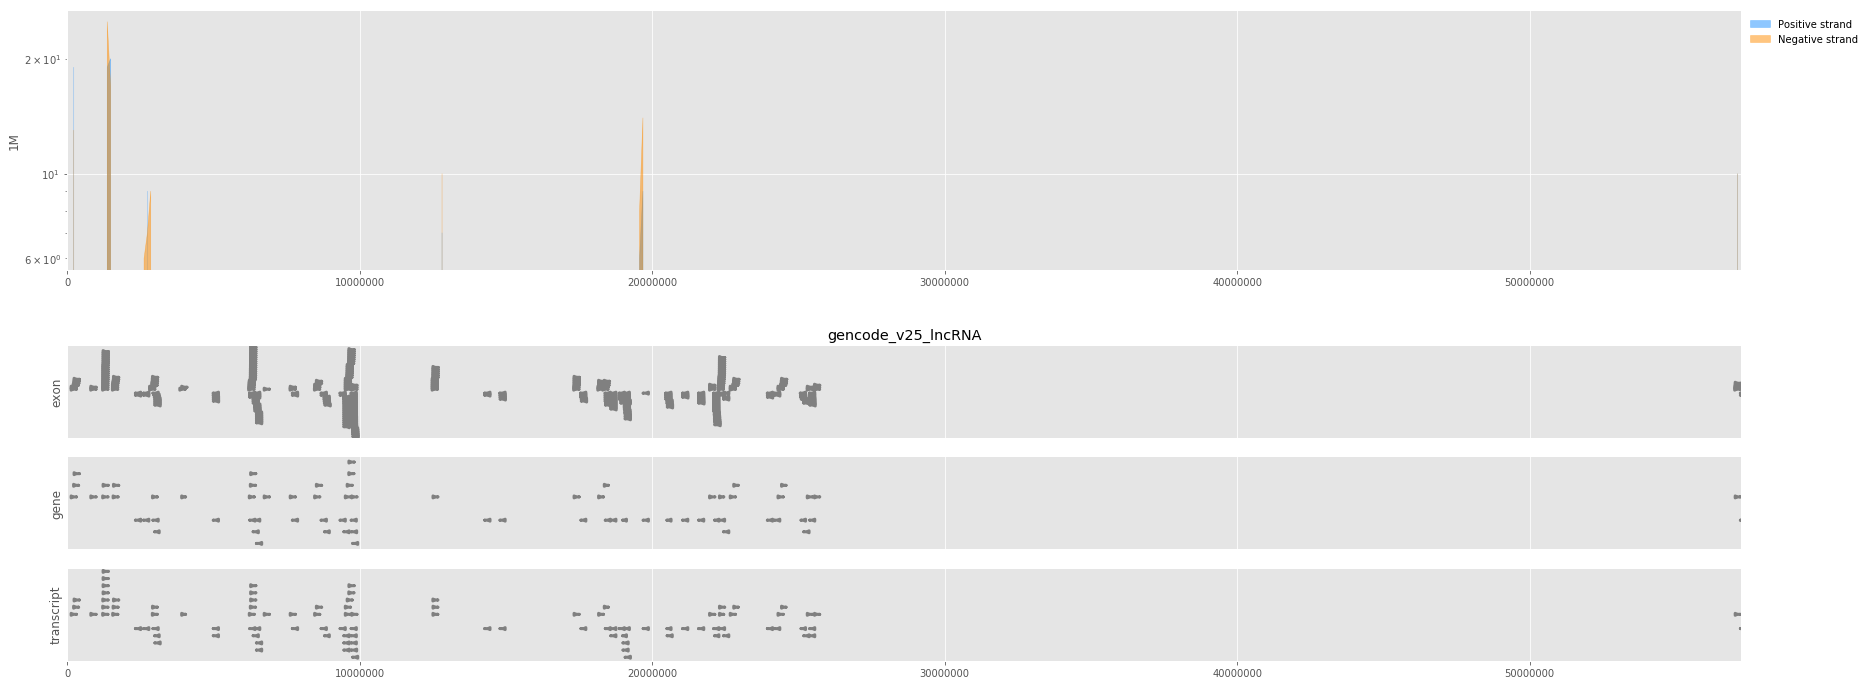

In [65]:
j.interval_plot(refid="chrY")

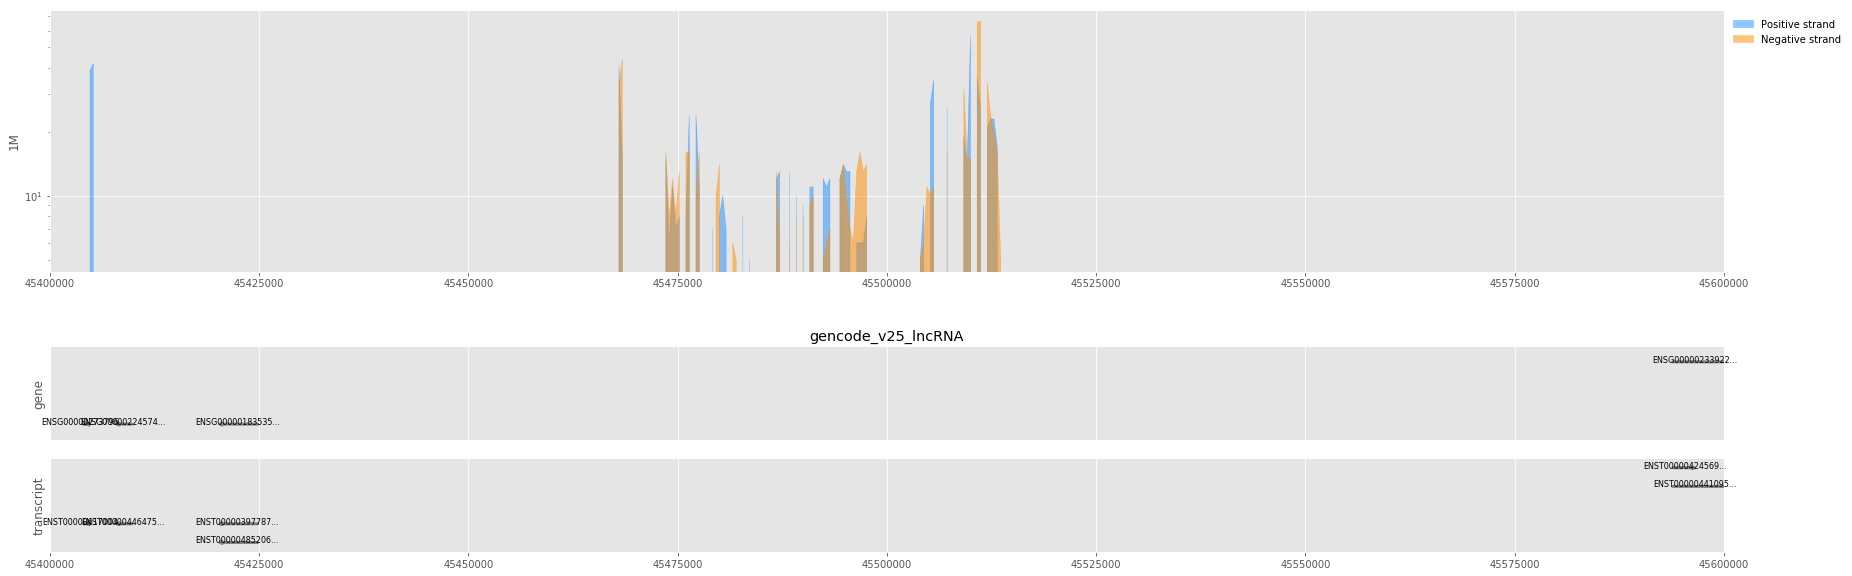

In [66]:
# Plot a specific windows and testing some of the options
j.interval_plot(refid="chr21", start=45400000, end=45600000, alignment_log= True, annotation_label=True, max_features_per_type=100, feature_types=["gene", "transcript"], max_label_size=15)

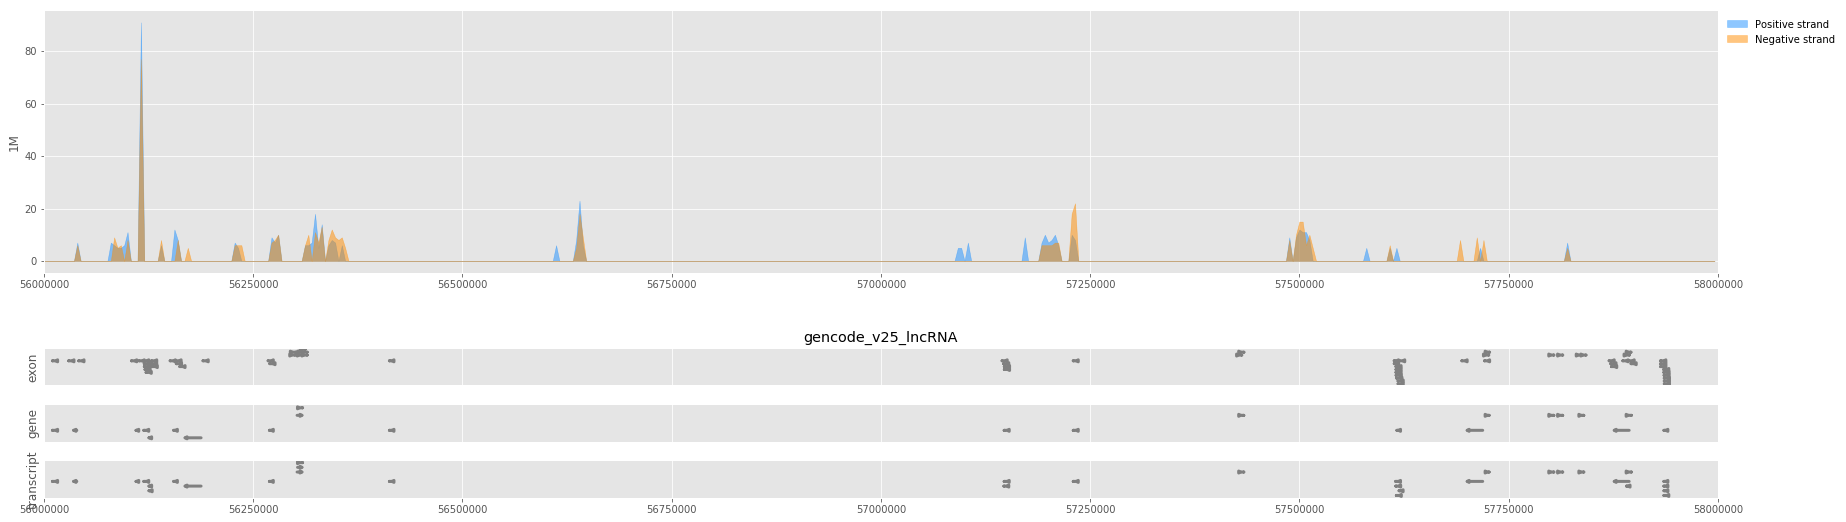

In [67]:
j.interval_plot(refid="chr12", start=56000000, end=58000000, alignment_log= False, annotation_track_height=1)

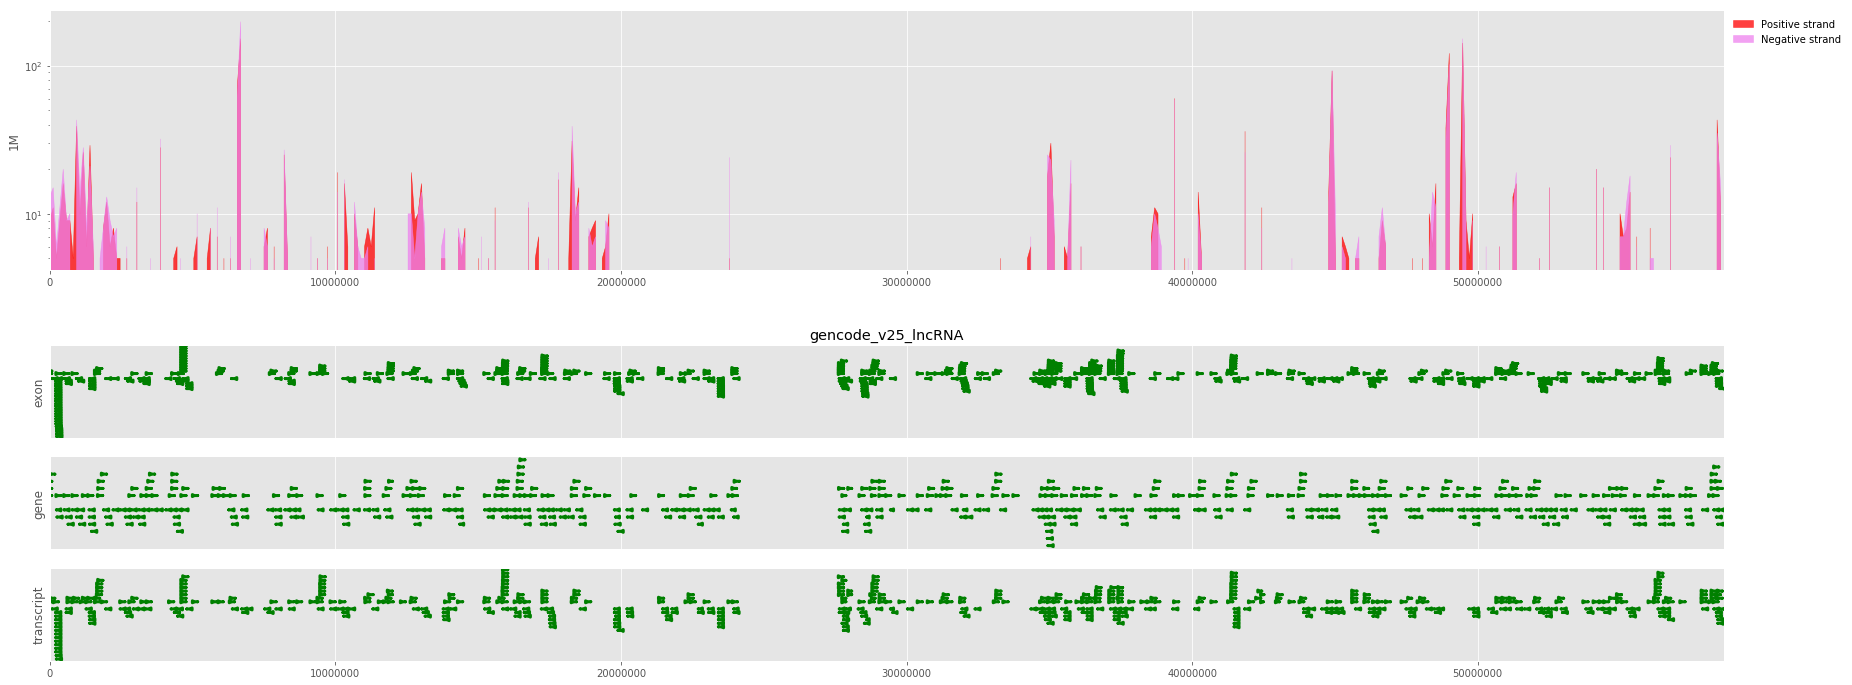

In [68]:
# Testing color customization
j.interval_plot(refid="chr19",  alignment_color=("red", "violet"), alignment_alpha=0.75, annotation_color="green")

**Test with a large annotation file** 

In [69]:
# Create fast instances of IGV
fp = "./downloaded_data/GRCh38_primary.tsv"
l = ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX', 'chrY', 'chrM']

# JGV object with 2 annotations and 2 alignment tracks
j = JGV(fp=fp, ref_list=l)
j.add_annotation("./downloaded_data/gencode_v25_primary.gff3.pkl")
j.add_alignment("./downloaded_data/1M.bed.gz")

CPU times: user 6.43 s, sys: 1.68 s, total: 8.1 s
Wall time: 6.05 s


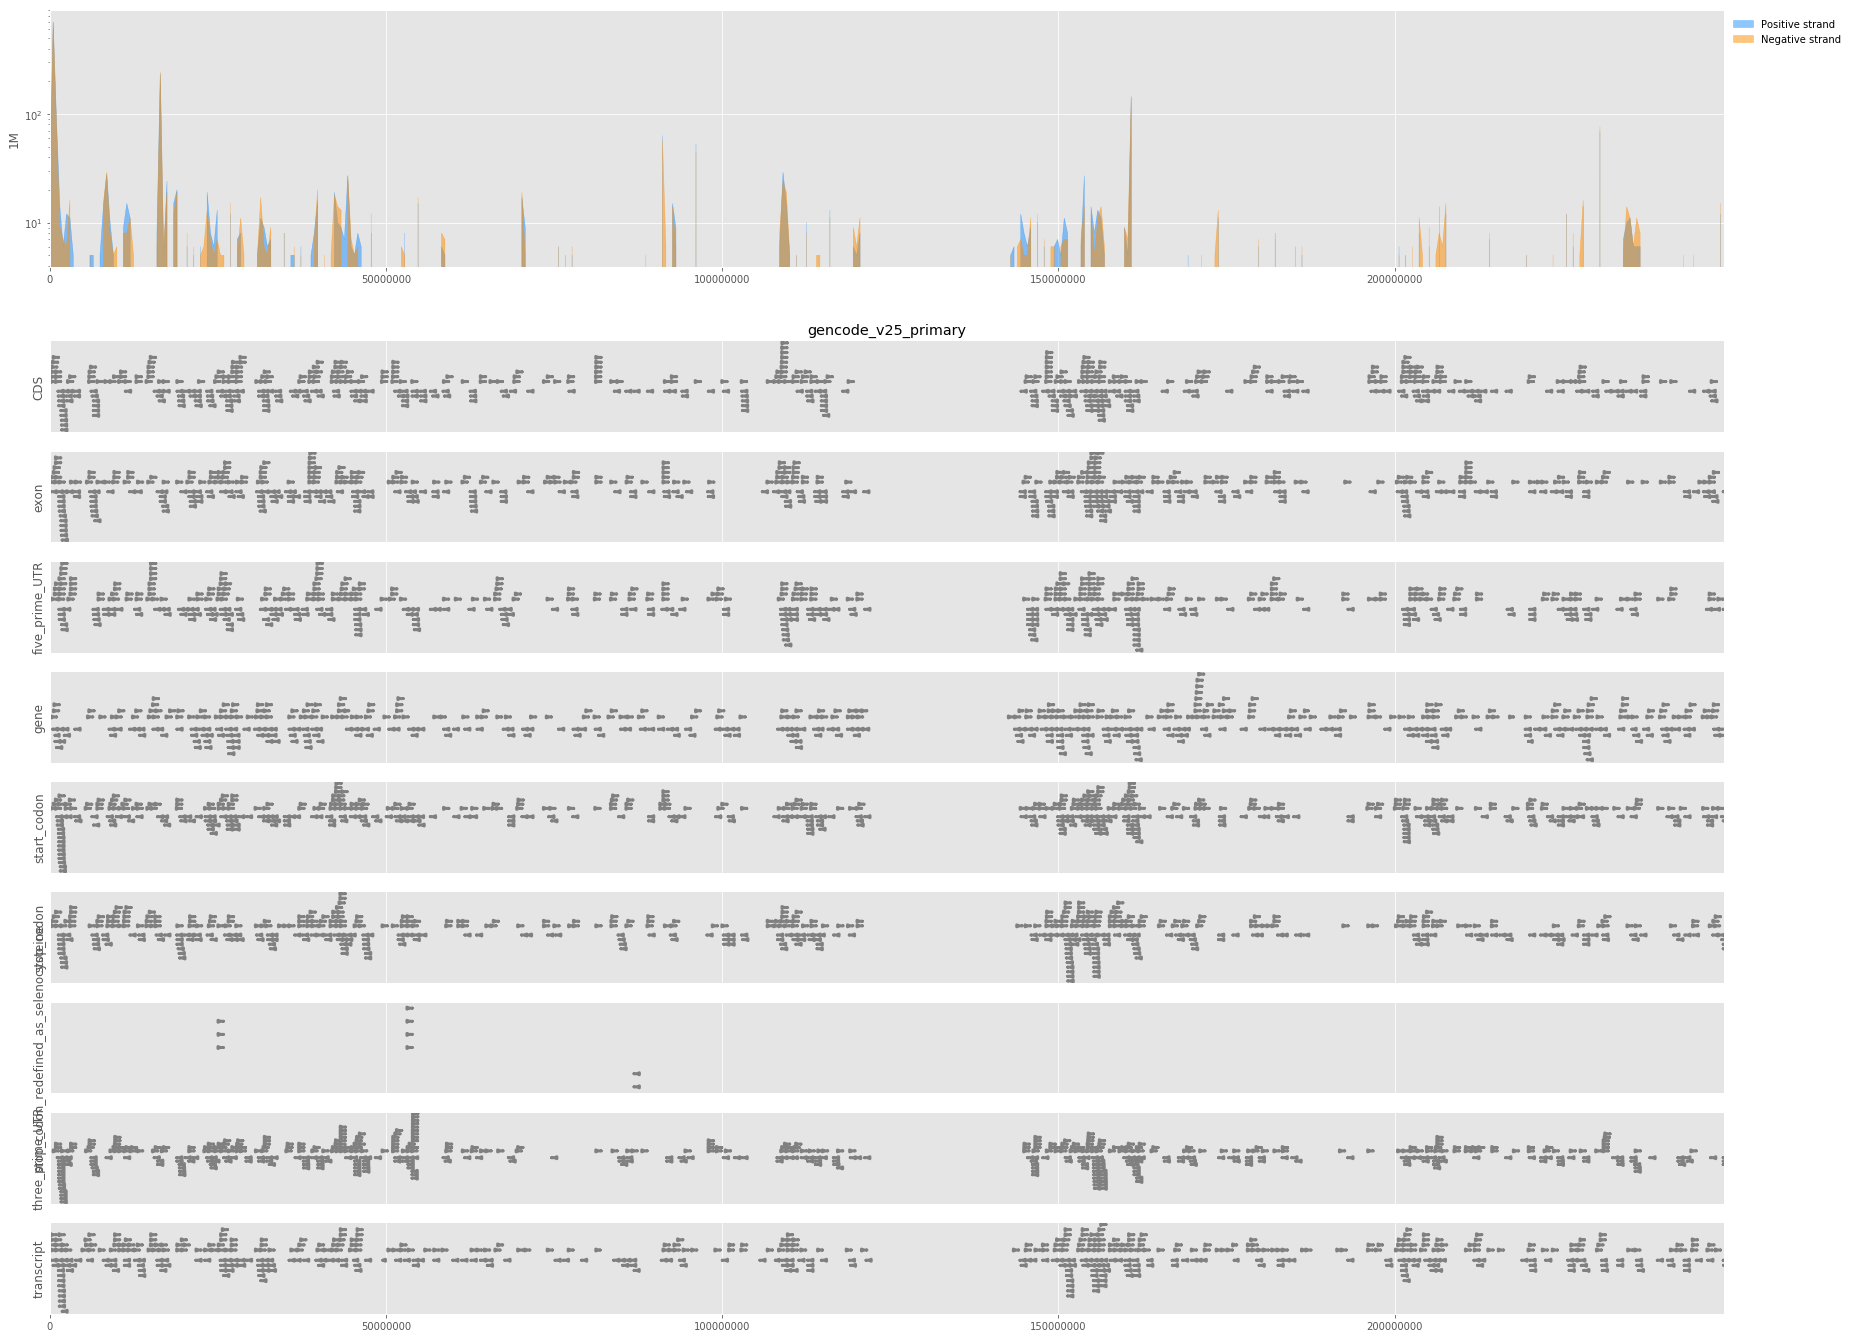

In [71]:
# Plot 
%time j.interval_plot(refid="chr1")